***Código do Projeto de Identificação de Pessoas utilizando a rede neural YOLO.***

**Componentes do grupo:**

Cecilia de Jesus Cerqueira - RA: 1272019114

Clarice de Jesus Cerqueira - RA: 12720110636

Gabriel Alexandria Santana - RA: 1272018579

Luan Carlos Pazos Salles Machado - RA: 1271925031

Matheus Alcântara Martins - RA: 1272018579



As devidas informções sobre o proposito desse projeto está no documento: *A3 COMPUTAÇÃO GRÁFICA - Projeto de Identificação de Pessoas utilizando a rede neural YOLO.*

O YOLO é um sistema de detecção de objetos em tempo real. Ele possui um código aberto para que qualquer pessoas possa utilizar, esse foi um dos fatores que possibilitou o desenvolvimento desse projeto.

Utilizamos o yolov4 (4° versão do YOLO) para elaborarmos o projeto.

É necessario seguir cada uma das etapas definidas nesse projeto.

# Instalando os pacotes e fazendo as configurações iniciais necessárias.

In [1]:
# Importando as bibliotecas que utilizaremos no decorrer do projeto
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
%matplotlib inline

O YOLO está disponível no repositório da Darknet. A Darknet é uma rede neural onde o YOLO(You Only Look Once) está disponível. A célula a seguir clona o repositório que disponibiliza o sistema.

In [2]:
# Clonando o projeto do darknet.
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 2.78 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


Foi necessário alterar o makefile, pois esse arquivo de texto contém instruções sobre como criar e vincular (ou compilar) um conjunto de arquivos de código-fonte.

Muda o makefile para que o OPENCV, GPU e LIBSO sejam habilitados.

Isso garante que o YOLOv4 possa utilizar a aceleração de hardware disponível para melhorar o desempenho.

In [3]:
# change makefile to have GPU, OPENCV and LIBSO enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


Este comando compila o código-fonte do YOLOv4 e cria o arquivo executável, permitindo executar o YOLOv4 para tarefas de detecção de objetos.

In [4]:
# make darknet (builds darknet so that you can then use the darknet.py file and have its dependencies)
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:

Este comando baixa os pesos pré-treinados para YOLOv4, que serão usados ​​como ponto de partida para treinar nosso detector de objetos customizado.

In [5]:
# get bthe scaled yolov4 weights file that is pre-trained to detect 80 classes (objects) from shared google drive
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq" -O yolov4-csp.weights && rm -rf /tmp/cookies.txt

--2023-12-05 17:06:22--  https://docs.google.com/uc?export=download&confirm=t&id=1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gu1ddj3iurleup2gh7s8dkplcttmc90s/1701795975000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=cedc05b5-a8cc-45bb-b992-8c001790a8eb [following]
--2023-12-05 17:06:23--  https://doc-14-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gu1ddj3iurleup2gh7s8dkplcttmc90s/1701795975000/17800843676226924807/*/1V3vsIaxAlGWvK4Aar9bAiK5U0QFttKwq?e=download&uuid=cedc05b5-a8cc-45bb-b992-8c001790a8eb
Resolving doc-14-84-docs.googleusercontent.com (doc-14-84-docs.googleusercontent.com)... 142.251.2.132, 2607:

# Chamando/criando a função darknet_helper

As funções abaixo irão auxiliar a executar a predição do YOLO em imagens, webcam e video pré-gravados.

In [6]:
# Importar as funções do darknet para fazer a detecção dos objetos.
from darknet import *
# load in our YOLOv4 architecture network
network, class_names, class_colors = load_network("cfg/yolov4-csp.cfg", "/content/coco.data", "yolov4-csp.weights")
width = network_width(network)
height = network_height(network)

# A função darknet_helper irá auxiliar na detecção de objetos em uma imagem
def darknet_helper(img, width, height):
  darknet_image = make_image(width, height, 3)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_resized = cv2.resize(img_rgb, (width, height),
                              interpolation=cv2.INTER_LINEAR)

  # Obtendo as proporções de imagem para converter caixas delimitadoras em tamanho adequado
  img_height, img_width, _ = img.shape
  width_ratio = img_width/width
  height_ratio = img_height/height

  # Execute o modelo na imagem estilo darknet para obter detecções
  copy_image_from_bytes(darknet_image, img_resized.tobytes())
  detections = detect_image(network, class_names, darknet_image)
  free_image(darknet_image)
  return detections, width_ratio, height_ratio

# Testando imagem

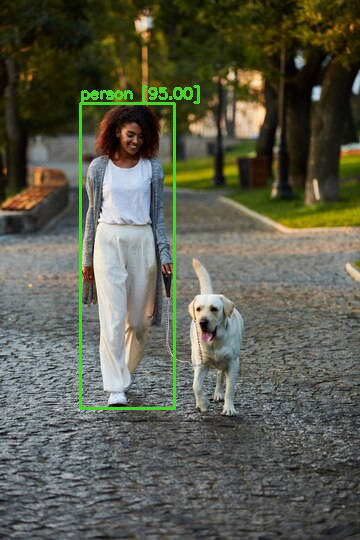

In [7]:
# Testando a imagem
image = cv2.imread("/content/mulher_e_cachorro.jpg")
detections, width_ratio, height_ratio = darknet_helper(image, width, height)

for label, confidence, bbox in detections:
  left, top, right, bottom = bbox2points(bbox)
  left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
  cv2.rectangle(image, (left, top), (right, bottom), class_colors[label], 2)
  cv2.putText(image, "{} [{:.2f}]".format(label, float(confidence)),
                    (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    class_colors[label], 2)
cv2_imshow(image)

# Tire uma foto e veja a previsão do YOLO.

Abaixo estão algumas funções auxiliares para fazer a conversão entre diferentes tipos e formatos de dados de imagem.

In [8]:
# Função para converter o objeto JavaScript em uma imagem OpenCV
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # Converter bytes em matriz numpy
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # Decodificar array numpy em imagem OpenCV BGR
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Função para converter a imagem da caixa delimitadora do retângulo OpenCV em uma string de bytes base64 para ser sobreposta no stream de vídeo
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # Converter o array em imagem PIL
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # Formatar o bbox para retornar uma imagem png
  bbox_PIL.save(iobuf, format='png')
  #Exibir a previsão do YOLO na imagem, é onde ele desenha a caixa e diz a qual classe pertece
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Tirar fotos através da webcam para verificar a previsão do YOLO.

O Google Colab disponibiliza uma variedade de códigos úteis, usaremos o trecho de código do câmera capture para utilizar a webcam do seu computador.


In [9]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensione a saída para caber no elemento de vídeo.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Esperando até que o botão "Capture" seja acionado.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # #Obtendo os dados da foto.
  data = eval_js('takePhoto({})'.format(quality))
  # Obtendo/lendo a imagem através do OpenCV
  img = js_to_image(data)

  # Chame a função darknet_helper para detectar os objetos na imagem.
  detections, width_ratio, height_ratio = darknet_helper(img, width, height)

  # Faz as detecções e exibe as predições na imagem
  for label, confidence, bbox in detections:
    left, top, right, bottom = bbox2points(bbox)
    left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
    cv2.rectangle(img, (left, top), (right, bottom), class_colors[label], 2)
    cv2.putText(img, "{} [{:.2f}]".format(label, float(confidence)),
                      (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                      class_colors[label], 2)
  # Salvando a imagem
  cv2.imwrite(filename, img)

  return filename

Execute a célula a seguir e verifique qual a predição.

Clique em : "capture" para tirar a foto e ver a predição do YOLO.

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Exibe a imagem que foi tirada.
  display(Image(filename))
except Exception as err:
  # Erros serão exibidos se o usuário não abrir/habilitar uma webcam.
  print(str(err))

# Previsão do YOLO - Webcam

Executar código em vídeo de webcam é um pouco mais complexo do que imagens.

Precisamos iniciar um stream de vídeo usando nossa webcam como entrada. Em seguida, executamos cada quadro em nosso programa (detecção de rosto) e criamos uma imagem de sobreposição que contém caixas delimitadoras de detecção(ões). Em seguida, sobrepomos a imagem da caixa delimitadora de volta ao próximo quadro do nosso stream de vídeo.

In [11]:
# O código abaixo também foi extraido do Google Colab. Utiliza o Javascript para criar nossa transmissão de vídeo utilizando a webcam como entrada.
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

**Iniciando a transmissão de vídeo por webcam.**

In [12]:
# Iniciando a Webcam
video_stream()
# Informando que a câmera está ativa
label_html = 'Capturing...'
# Iniciando a caixa delimitadora = vazia
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # Converte o frame gerado pelo JS em uma imagem que pode ser lida pelo OpenCV
    frame = js_to_image(js_reply["img"])

    # Criando uma sobreposição transparente para a caixa delimitadora.
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # Chame a função darknet_helper para ajudar na detecção dos objetos do vídeo
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    # Exibe as detecções do YOLO
    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      bbox_array = cv2.rectangle(bbox_array, (left, top), (right, bottom), class_colors[label], 2)
      bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255

    bbox_bytes = bbox_to_bytes(bbox_array)

    bbox = bbox_bytes

<IPython.core.display.Javascript object>

# Importe um vídeo e analise as previsões do YOLO.

In [13]:
# Importando as bibliotecas que serão utilizadas para ler o vídeo.
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Carregue o arquivo do vídeo de sua escolha (obs.: quanto maior a duração do vídeo mais ...
#... tempo para carregar a detecção,é recomendável colocar um vídeo que tenha no máximo 14 segundo de duração.
cap = cv2.VideoCapture('/content/video.mp4')

# Obtendo o FPS do vídeo
#A função get() é usada para recuperar os quadros por segundo (FPS) atuais do vídeo.
fps = cap.get(cv2.CAP_PROP_FPS)

# Definindo o nome do arquivo de saída e o FPS necessário.
# Em seguida, definiremos o nome do arquivo de vídeo de saída com a extensão '.mp4' ...
# ... e definiremos o FPS do vídeo de saída para o dobro do FPS do vídeo de entrada.
output_file = 'output.mp4'
output_fps = fps * 2

# Salvar o resultado do processamento de imagem na forma de um novo arquivo de vídeo.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, output_fps,
					(int(cap.get(3)), int(cap.get(4))))

# Conversão de FPS de vídeo
# Cada quadro do arquivo de vídeo de entrada é lido usando a função read() e ...
# ...gravado no arquivo de vídeo de saída usando a função write(). O loop while continua até que ...
# ...todos os quadros tenham sido processados. A variável “ret” verifica se um quadro foi lido com...
# ... sucesso do arquivo de vídeo.
while cap.isOpened():
  ret, frame = cap.read()
  if ret:
  # Chame a função darknet_helper para ajudar na detecção dos objetos do vídeo
    detections, width_ratio, height_ratio = darknet_helper(frame, width, height)

    for label, confidence, bbox in detections:
      left, top, right, bottom = bbox2points(bbox)
      left, top, right, bottom = int(left * width_ratio), int(top * height_ratio), int(right * width_ratio), int(bottom * height_ratio)
      cv2.rectangle(frame, (left, top), (right, bottom), class_colors[label], 2)
      cv2.putText(frame, "{} [{:.2f}]".format(label, float(confidence)),
                        (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        class_colors[label], 2)
  if not ret:
    break


  out.write(frame)
#  Fechando os arquivos de vídeo
cap.release()
out.release()
cv2.destroyAllWindows()

# Baixando o arquivo de vídeo de saída no seu computador. o nome do video será "output.mp4".
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>